<a href="https://colab.research.google.com/github/lt33tx/Landon_Tinch_DTSC3020_Fall2025-/blob/main/Assignment_3_4050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Assignment: Functions and Visualizations


We will use the following datasets:
- `directory.csv`: Contains data on people or items along with their identifying details, such as names, contact information, and organizational roles, like a digital phonebook or roster.
- `books.csv`: Contains information about books.

### Learning Objectives:
- Defining and using Python functions.
- Applying transformations with `apply`.
- Performing data analysis using Pandas.
- Creating histograms to visualize data.

### Instructions:
Run the setup cell below before beginning the questions.


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
directory = pd.read_csv("directory.csv")
books = pd.read_csv("books.csv", on_bad_lines='skip')

# Display first few rows of each dataset
directory.head(), books.head()

(       Brand  Store Number        Store Name Ownership Type  \
 0  Starbucks  47370-257954     Meritxell, 96       Licensed   
 1  Starbucks  22331-212325  Ajman Drive Thru       Licensed   
 2  Starbucks  47089-256771         Dana Mall       Licensed   
 3  Starbucks  22126-218024        Twofour 54       Licensed   
 4  Starbucks  17127-178586      Al Ain Tower       Licensed   
 
                     Street Address              City State/Province Country  \
 0                Av. Meritxell, 96  Andorra la Vella              7      AD   
 1             1 Street 69, Al Jarf             Ajman             AJ      AE   
 2     Sheikh Khalifa Bin Zayed St.             Ajman             AJ      AE   
 3                  Al Salam Street         Abu Dhabi             AZ      AE   
 4  Khaldiya Area, Abu Dhabi Island         Abu Dhabi             AZ      AE   
 
   Postcode Phone Number                 Timezone  Longitude  Latitude  
 0    AD500    376818720  GMT+1:00 Europe/Andorra       1.5

## Question 1: Defining Functions

### 1.1 Counting Unique Cities

Define a function `count_unique_cities` that returns the number of unique cities in the `directory` dataset.

In [28]:
def count_unique_cities(df):
    return df['City'].nunique()

print(count_unique_cities(directory))

5469


### 1.2 Extracting Top Rated Books

Define a function `top_rated_books` that returns books with a rating above 4.5 in the `books` dataset.

In [29]:
def top_rated_books(df):
    return df[df['average_rating'] >= 4.5]

top_books = top_rated_books(books)
print(top_books)



       bookID                                              title  \
0           1  Harry Potter and the Half-Blood Prince (Harry ...   
3           5  Harry Potter and the Prisoner of Azkaban (Harr...   
4           8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
6          10       Harry Potter Collection (Harry Potter  #1-6)   
21         30  J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...   
...       ...                                                ...   
10675   43509  Harry Potter and the Goblet of Fire (Harry Pot...   
10790   44030                                       Looking East   
10918   44734  Fullmetal Alchemist  Vol. 6 (Fullmetal Alchemi...   
10937   44826  The Price of the Ticket: Collected Nonfiction ...   
10940   44849  Code Check Electrical: An Illustrated Guide to...   

                                                authors  average_rating  \
0                            J.K. Rowling/Mary GrandPré            4.57   
3                            J.K.

### 1.3  Finding the Longest Book




Define a function `longest_book` that returns the book with the highest page count from the `books` dataset.

In [30]:
books.columns = books.columns.str.strip()

def longest_book(df):
    return df.loc[df['num_pages'].idxmax()]

print(longest_book(books))


bookID                                                         24520
title                 The Complete Aubrey/Maturin Novels (5 Volumes)
authors                                              Patrick O'Brian
average_rating                                                   4.7
isbn                                                      039306011X
isbn13                                                 9780393060119
language_code                                                    eng
num_pages                                                       6576
ratings_count                                                   1338
text_reviews_count                                                81
publication_date                                          10/17/2004
publisher                                      W. W. Norton  Company
Name: 6497, dtype: object


### 1.4 Counting Businesses by State

Define a function `count_businesses_by_state` that returns a dictionary where keys are states and values are the number of businesses in each state from the `directory` dataset.

In [31]:
def count_businesses_by_state(df):
    return df.groupby('State/Province')['Store Number'].count().to_dict()

print(count_businesses_by_state(directory))

{'0': 89, '1': 193, '10': 275, '11': 706, '12': 145, '13': 363, '14': 180, '15': 26, '16': 28, '17': 13, '18': 8, '19': 10, '2': 68, '20': 27, '21': 72, '22': 44, '23': 100, '24': 19, '25': 13, '26': 117, '27': 151, '28': 82, '29': 47, '3': 56, '30': 45, '31': 580, '32': 359, '33': 329, '34': 206, '35': 99, '36': 16, '37': 84, '38': 11, '39': 4, '4': 51, '40': 79, '41': 341, '42': 105, '43': 56, '44': 359, '45': 39, '46': 31, '47': 55, '48': 41, '49': 13, '5': 36, '50': 51, '51': 104, '52': 10, '53': 24, '54': 2, '55': 3, '57': 1, '6': 68, '60': 1, '61': 42, '62': 3, '63': 3, '64': 2, '65': 1, '7': 62, '70': 1, '73': 2, '74': 1, '77': 3, '8': 43, '80': 1, '81': 4, '83': 12, '84': 12, '9': 38, '90': 2, '91': 162, '92': 13, 'A': 4, 'A1': 20, 'AB': 304, 'AG': 3, 'AGU': 5, 'AH': 10, 'AJ': 2, 'AK': 49, 'AL': 85, 'ALA': 6, 'ALX': 1, 'AM': 16, 'AN': 16, 'AP': 6, 'AR': 55, 'ARE': 5, 'AST': 2, 'AW': 3, 'AZ': 536, 'B': 40, 'BA': 37, 'BB': 2, 'BC': 416, 'BCN': 18, 'BCS': 8, 'BE': 30, 'BI': 13, 'B

### 1.5 Finding Authors with Multiple Books

Define a function `authors_with_multiple_books` that returns a list of authors who have more than one book in the `books` dataset.

In [32]:
def authors_with_multiple_books(df):
    author_counts = df['authors'].value_counts()
    return author_counts[author_counts > 1].index.tolist()

print(authors_with_multiple_books(books))


['Stephen King', 'P.G. Wodehouse', 'Rumiko Takahashi', 'Orson Scott Card', 'Agatha Christie', 'Piers Anthony', 'Mercedes Lackey', 'Sandra Brown', 'Dick Francis', 'Margaret Weis/Tracy Hickman', 'Terry Pratchett', 'James Patterson', 'Laurell K. Hamilton', 'Gordon Korman', 'Alan Dean Foster', 'Janet Evanovich', 'Bill Bryson', 'Dan Simmons', 'Dean Koontz', 'Gabriel García Márquez', 'Philip Roth', 'Terry Brooks', 'Robert A. Heinlein', 'Jodi Picoult', 'J.R.R. Tolkien', 'Anne Rice', 'Marian Keyes', 'Joyce Carol Oates', 'Roald Dahl', 'John Grisham', 'Dr. Seuss', 'Toni Morrison', 'Maeve Binchy', 'Roald Dahl/Quentin Blake', 'Nora Roberts', 'Francine Pascal/Kate William', 'Michael Crichton', 'Paul Auster', 'Alexander McCall Smith', 'V.C. Andrews', 'Kurt Vonnegut Jr.', 'William Shakespeare', 'Jeffery Deaver', 'J.R.R. Tolkien/Christopher Tolkien', 'Isaac Asimov', 'Douglas Adams', 'Don DeLillo', 'Nicholas Sparks', 'Tite Kubo', 'Clive Cussler', 'Erin St. Claire/Sandra Brown', 'John Irving', 'Mary Hig

## Question 2: Applying Transformations

### 2.1 Standardizing City Names

Define a function `standardize_city_names` that converts all city names in the `directory` dataset to lowercase using `apply`.

In [35]:
def standardize_city_names(df):
    df['City'] = df['City'].str.lower()
    return df

directory = standardize_city_names(directory)
print(directory['City'].head())

0    andorra la vella
1               ajman
2               ajman
3           abu dhabi
4           abu dhabi
Name: City, dtype: object


### 2.2 Categorizing Book Length

Define a function `categorize_book_length` that adds a new column `length_category` to `books`, categorizing books as `Short` (<200 pages), `Medium` (200-400 pages), or `Long` (>400 pages).

In [38]:

books.columns = books.columns.str.strip()

def categorize_book_length(df):
    df['length_category'] = df['num_pages'].apply(lambda pages: 'Short' if pages < 200 else ('Medium' if pages <= 400 else 'Long'))
    return df

books = categorize_book_length(books)
print(books[['title', 'num_pages', 'length_category']].head())

                                               title  num_pages  \
0  Harry Potter and the Half-Blood Prince (Harry ...        652   
1  Harry Potter and the Order of the Phoenix (Har...        870   
2  Harry Potter and the Chamber of Secrets (Harry...        352   
3  Harry Potter and the Prisoner of Azkaban (Harr...        435   
4  Harry Potter Boxed Set  Books 1-5 (Harry Potte...       2690   

  length_category  
0            Long  
1            Long  
2          Medium  
3            Long  
4            Long  


## Question 3: Data Analysis

### 3.1 Most Common State

Define a function `most_common_state` that returns the most frequently occurring state in the `directory` dataset.

In [39]:
def most_common_state(df):
    return df['State/Province'].mode()[0]

print(most_common_state(directory))


CA


## Question 4: Histograms

### 4.1 Histogram of Business Listings per City

Create a histogram showing the distribution of the number of businesses per city in the `directory` dataset.

Histogram saved as businesses_per_city_histogram.png


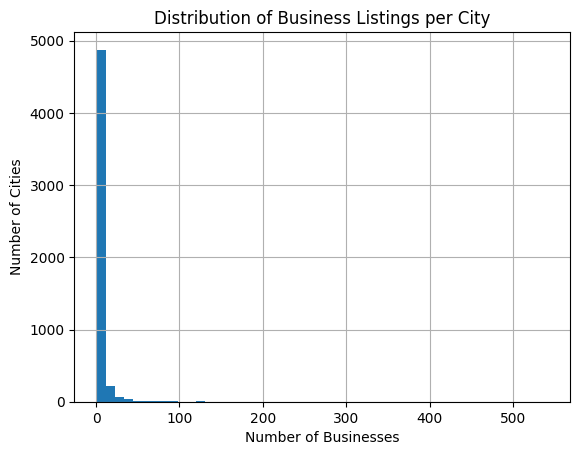

In [40]:
def plot_business_city_histogram(df):
    city_counts = df['City'].value_counts()
    city_counts.hist(bins=50)
    plt.title('Distribution of Business Listings per City')
    plt.xlabel('Number of Businesses')
    plt.ylabel('Number of Cities')
    plt.savefig('businesses_per_city_histogram.png')
    return "Histogram saved as businesses_per_city_histogram.png"

print(plot_business_city_histogram(directory))

### 4.2 Histogram of Book Ratings

Create a histogram of book ratings from the `books` dataset.

Histogram saved as book_ratings_histogram.png


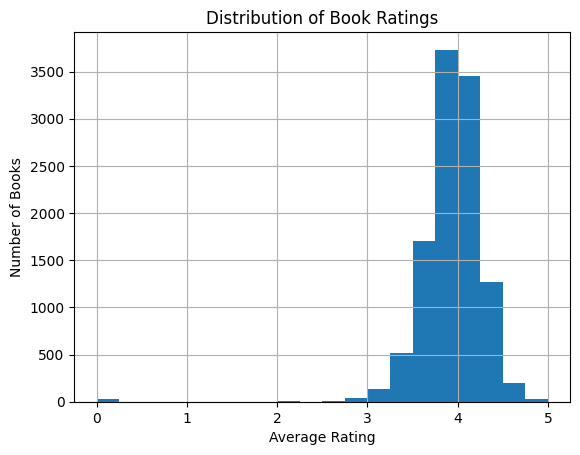

In [41]:
def plot_rating_histogram(df):
    df['average_rating'].hist(bins=20)
    plt.title('Distribution of Book Ratings')
    plt.xlabel('Average Rating')
    plt.ylabel('Number of Books')
    plt.savefig('book_ratings_histogram.png')
    return "Histogram saved as book_ratings_histogram.png"

print(plot_rating_histogram(books))
